<a href="https://colab.research.google.com/github/AdityaTanejaRox/SpamEmailClassification/blob/main/Bayes_Classifier_Testing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOTEBOOK IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**CONSTANTS**

In [ ]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEARURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

**LOAD THE DATA**

In [ ]:
#Features
X_test = np.loadtxt(TEST_FEARURE_MATRIX, delimiter=' ')
#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

**CALCULATING THE JOINT PROBABILITY**

**The Dot Product**

In [ ]:
X_test.shape

(1725, 2500)

In [ ]:
prob_token_spam.shape

(2500,)

In [ ]:
print('Shape of dot product is ', X_test.dot(prob_token_spam).shape)

Shape of dot product is  (1725,)


**##SETTING THE PRIOR**

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [ ]:
PROB_SPAM = 0.3014

In [ ]:
np.log(prob_token_spam)

array([ -4.46476272,  -5.27140157,  -4.94614822, ..., -11.47191074,
        -9.3924692 ,  -8.79776209])

##**JOINT PROBABILITY IN LOG FORMAT**

In [ ]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [ ]:
joint_log_spam[:5]

array([19.56503837,  0.69534256, 18.51851416, 17.23064725, 20.64871642])

**Calculating joint probability given email is nonspam**

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1 - P(Spam))} {P(X)}$$

In [ ]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [ ]:
joint_log_ham[:5]

array([-59.39926234, -10.88583377, -36.6336348 , -61.75594938,
       -58.45295746])

In [ ]:
joint_log_ham.size

1725

**##MAKING PREDICTIONS**

**Checking for Higher Joint Probability**

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>OR</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [ ]:
prediction = joint_log_spam > joint_log_ham

In [ ]:
prediction[-5:]

array([False, False, False, False, False])

In [ ]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify 

$$P(X \, | \, Spam) \, P(Spam) \, != \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [ ]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

## METRICS AND EVALUATION 
## ACCURACY

In [ ]:
correct_doc = (y_test == prediction).sum()
print('Docs classified correctly', correct_doc)
numdoc_wrong = X_test.shape[0] - correct_doc
print('Docs classified incorrectly', numdoc_wrong)

Docs classified correctly 1677
Docs classified incorrectly 48


In [ ]:
#Accuracy = Correct Docs / Total no.of Docs
correct_doc/len(X_test)

0.9721739130434782

In [ ]:
fraction_wrong = numdoc_wrong / len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1 - fraction_wrong))

Fraction classified incorrectly is 2.78%
Accuracy of the model is 97.22%


## VISUALIZING THE RESULTS

In [ ]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start = -1200, stop = 200, num = 1000)

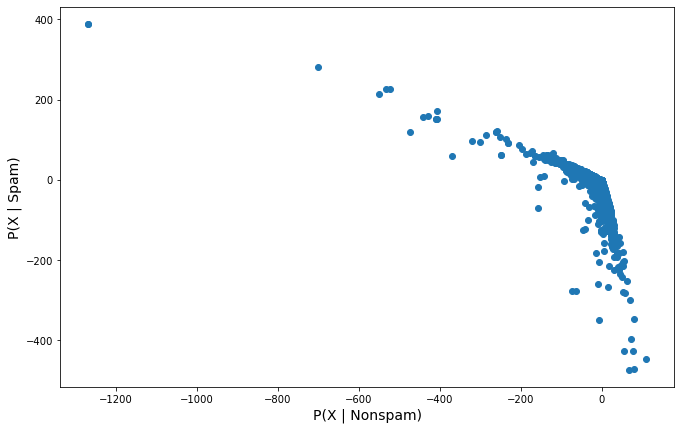

In [ ]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize =14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.scatter(joint_log_ham, joint_log_spam)
plt.show()

## DECISION BOUNDARY

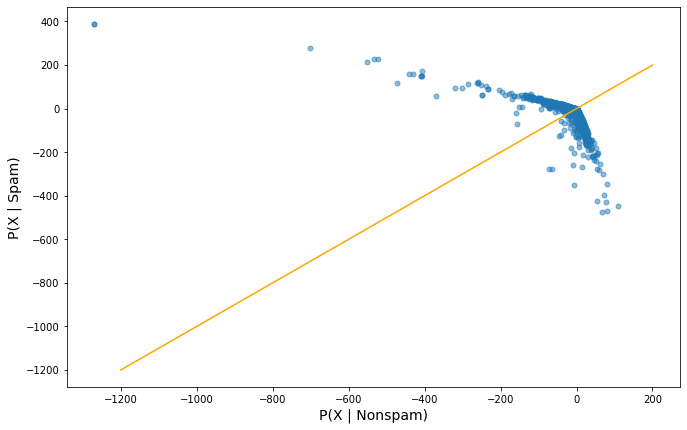

In [ ]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize =14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.scatter(joint_log_ham, joint_log_spam, alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')
plt.show()

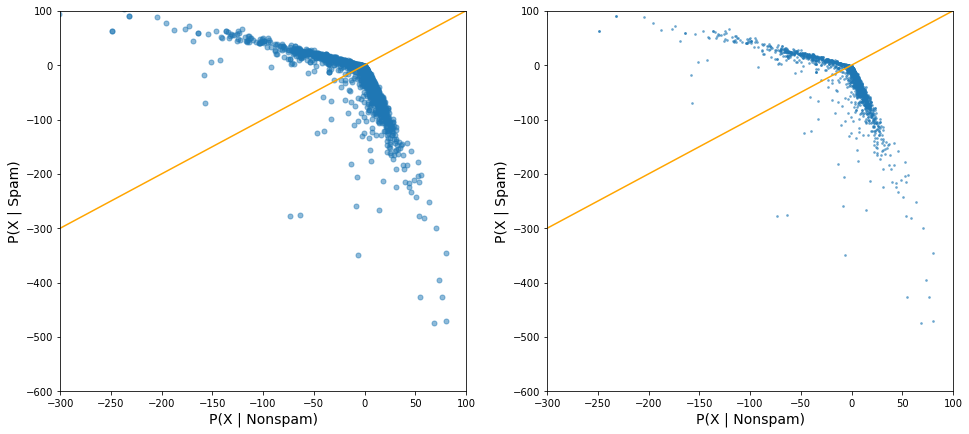

In [ ]:
plt.figure(figsize=(16,7))

#Graph 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize =14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-300, 100])
plt.ylim([-600, 100])

plt.scatter(joint_log_ham, joint_log_spam, alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = 'orange')

#Graph 2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize =14)
plt.ylabel(yaxis_label, fontsize = 14)

plt.xlim([-300, 100])
plt.ylim([-600, 100])

plt.scatter(joint_log_ham, joint_log_spam, alpha = 0.5, s = 3)
plt.plot(linedata, linedata, color = 'orange')


plt.show()

In [ ]:
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label : joint_log_ham,
                          labels : y_test})

AttributeError: module 'seaborn' has no attribute 'plt'

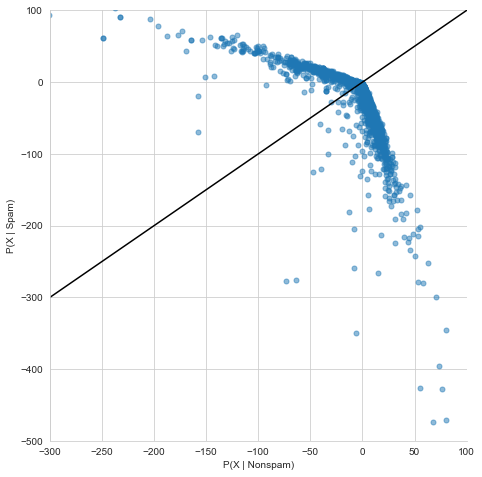

In [ ]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size = 6.5, fit_reg = False
          ,scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-300, 100])
plt.ylim([-500, 100])

plt.plot(linedata, linedata, color = 'black')
sns.plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

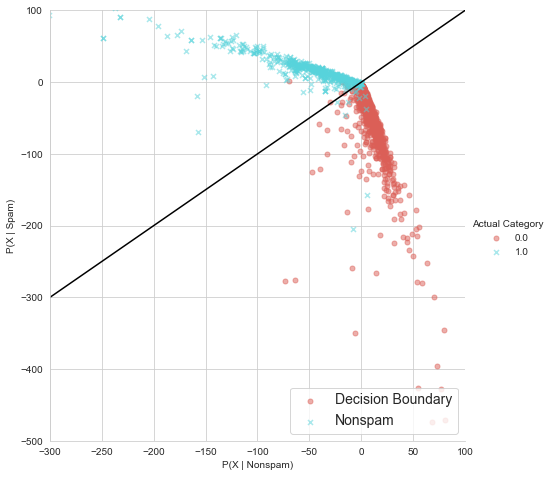

In [ ]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size = 6.5, fit_reg = False
          ,scatter_kws={'alpha': 0.5, 's': 25}, hue = labels, markers = ['o', 'x'], palette = 'hls')

plt.xlim([-300, 100])
plt.ylim([-500, 100])

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc = 'lower right', fontsize = 14)

plt.plot(linedata, linedata, color = 'black')
sns.plt.show()

### FALSE POSITIVES AND FALSE NEGATIVES

In [ ]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1160,  565], dtype=int64))

In [ ]:
true_pos = (y_test == 1) & (prediction == 1)

In [ ]:
true_pos.sum()

554

In [ ]:
true_pos

array([ True,  True,  True, ..., False, False, False])

In [ ]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

#when model thought email was spam but was actually ham

11

In [ ]:
false_neg = (y_test == 1) & (prediction == 0)
false_pos.sum()

#Prediction was nonspam but was actually spam

11

### RECALL SCORE

In [ ]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 93.74%


### PRECISION METRIC

In [ ]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision Score is {:.3}'.format(precision_score))

Precision Score is 0.981


## F - SCORE OR F1 SCORE

In [ ]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F-Score is {:.2}'.format(f1_score))
#F-Score is harmonic mean of recall score and precision score 

F-Score is 0.96
